#**주차 수요 분석**
# 단계2 : 탐색적 데이터 분석

## 0.미션

* 미션4 : 이전 파일에서 생성한 base_data에 대해서 탐색적 분석을 수행합니다.
    * 단변량 분석
        * 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스를 파악합니다.
    * 이변량 분석
        * Target은 실차량수(숫자) 입니다.
        * 숫자형 feature --> 숫자형 Target 에 대해 전체 상관계수를 구해 확인합니다.
            * 상관계수가 높은 feature들에 대해 따로 산점도를 그려 확인합니다.
        * 범주형 feature --> 숫자형 Target
            * 평균 비교 barplot(sns.barplot)을 활용하여 비교합니다.
    * 전처리 추가
        * 범주형 feature 중에는 적은 수의 범주가 포함되어 있습니다. 가능한 범주끼리 묶어 봅시다.
    * 관계 정리하기

## 1.환경설정

* 세부 요구사항
    * 제공된 압축파일을 다운받아 압축을 풀고
    * anaconda의 root directory(보통 C:/Users/< ID > 에 project2 폴더를 만들고, 복사해 넣습니다.
    * 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 라이브러리 불러오기

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

### (2) 한글폰트 지정

In [335]:
import matplotlib.font_manager as fm

# 설치된 폰트
font_list = [font.name for font in fm.fontManager.ttflist]

# 맑은고딕이 있는지 확인
'Malgun Gothic' in font_list

True

In [336]:
plt.rcParams['font.family'] = 'Malgun Gothic'

### (3) 경로 설정

* project2 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [339]:
path = ''

### (4) 데이터 불러오기

* 단계1에서 저장한 파일을 불러 옵니다.
    * base_data.pkl

In [342]:
base_data = joblib.load(path+'result.pkl')

In [343]:
base_data.head()

,단지코드,총세대수,지역,준공년도,건물형태,난방방식,승강기설치여부,실차량수,전용면적별세대수,전용면적,...,임대보증금,임대료,단지별 면적별 구간,전용면적_구간,공급별_총_면적,단지별_임대보증금_평균,단지별_임대료_평균,지역_임대료_평균,지역_임대보증금_평균,단지별_차량비율
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,35,51.89,...,50758000,620370,3구간,소형 아파트,2490.26,56962000.0,642930.0,367474.03,44909152.78,0.715596
1,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,43,59.93,...,63166000,665490,4구간(최상위),소형 아파트,3533.51,56962000.0,642930.0,367474.03,44909152.78,0.715596
2,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,26,27.75,...,63062000,458640,1구간(최하위),초소형 주택,1151.48,63062000.0,470100.0,367474.03,44909152.78,1.000000
3,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,9,29.08,...,63062000,481560,1구간(최하위),초소형 주택,417.69,63062000.0,470100.0,367474.03,44909152.78,1.000000
4,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7,59.47,...,72190000,586540,3구간,소형 아파트,569.91,72190000.0,586540.0,367474.03,44909152.78,1.000000


In [344]:
base_data['준공년도'].min()

1970

## 2.탐색적 데이터분석

* **세부 요구사항**
    * 기본 분석
        * 기초 통계량, NaN 값 확인 등 기본 분석을 수행합니다.
    * 단변량 분석
        - 단일 변수로 분석 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        - 여러 변수를 묶어서 분석 : 건물구분, 공급유형
    * 이변량 분석
        - 전체 상관계수를 구하고 시각화 합니다.
        - 상관계수가 높은 변수에 대한 산점도를 구해봅니다.

### (1) 기본 분석

* **세부 요구사항**
    - 데이터프레임 전체에 대한 기초통계량을 구합니다.
    - NaN을 확인해 봅시다.

In [349]:
# 데이터 전체에 대한 기초 통계량
base_data.describe()

,총세대수,준공년도,실차량수,전용면적별세대수,전용면적,공급면적(공용),임대보증금,임대료,공급별_총_면적,단지별_임대보증금_평균,단지별_임대료_평균,지역_임대료_평균,지역_임대보증금_평균,단지별_차량비율
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1.157000e+03,1.157000e+03,1157.000000,1.157000e+03,1157.000000,1157.000000,1.157000e+03,1157.000000
mean,659.075194,2008.299914,650.762316,163.691443,51.565584,20.562360,2.850789e+07,2.259409e+05,11117.129153,2.850789e+07,225940.882800,225940.881850,2.850789e+07,1.161917
std,456.110643,6.982611,390.573462,166.766358,18.243315,5.164405,2.890687e+07,1.768102e+05,11417.523803,2.701517e+07,172534.344433,68941.471892,1.071471e+07,0.965909
min,1.000000,1970.000000,21.000000,1.000000,17.590000,5.850000,0.000000e+00,0.000000e+00,30.100000,0.000000e+00,0.000000,146365.290000,1.101400e+07,0.001117
25%,315.000000,2005.000000,320.000000,44.000000,39.480000,16.997400,1.379700e+07,1.177400e+05,3070.670000,1.497950e+07,132910.000000,163060.950000,2.021592e+07,0.848970
50%,595.000000,2009.000000,626.000000,112.000000,46.900000,20.384700,1.997300e+07,1.842900e+05,7734.660000,2.131914e+07,185656.700000,207075.850000,2.223343e+07,1.075200
75%,918.000000,2013.000000,894.000000,229.000000,59.810000,23.722500,3.375300e+07,2.634400e+05,15042.640000,3.234567e+07,246652.500000,267359.760000,4.044478e+07,1.269461
max,2289.000000,2022.000000,1657.000000,1258.000000,139.350000,42.760000,2.549220e+08,1.058030e+06,90472.670000,1.898219e+08,950305.000000,367474.030000,4.490915e+07,8.632353


In [350]:
base_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          1157 non-null   object  
 1   총세대수          1157 non-null   int64   
 2   지역            1157 non-null   object  
 3   준공년도          1157 non-null   int32   
 4   건물형태          1157 non-null   object  
 5   난방방식          1157 non-null   object  
 6   승강기설치여부       1157 non-null   object  
 7   실차량수          1157 non-null   int64   
 8   전용면적별세대수      1157 non-null   int64   
 9   전용면적          1157 non-null   float64 
 10  공급면적(공용)      1157 non-null   float64 
 11  임대보증금         1157 non-null   int64   
 12  임대료           1157 non-null   int64   
 13  단지별 면적별 구간    1157 non-null   category
 14  전용면적_구간       1157 non-null   category
 15  공급별_총_면적      1157 non-null   float64 
 16  단지별_임대보증금_평균  1157 non-null   float64 
 17  단지별_임대료_평균    1157 non-null   float64 
 18  지역_임대료_평

### (2) 단변량 분석



* **세부 요구사항**
    - 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
    - 단일 변수로 분석
        * 대상 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        * 도구 : 기초통계량, boxplot, histogram 을 통한 데이터 분포 파악
    - 여러 변수를 묶어서 분석 : 전용면적, 건물구분, 공급유형
        * pd.melt를 이용하여 pivot을 해제하고
        * sns.barplot으로 그래프를 그려서 비교해 봅시다.

In [353]:
def eda_1_n(data,var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,5))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()


# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
총세대수,1157.0,659.075194,456.110643,1.0,315.0,595.0,918.0,2289.0


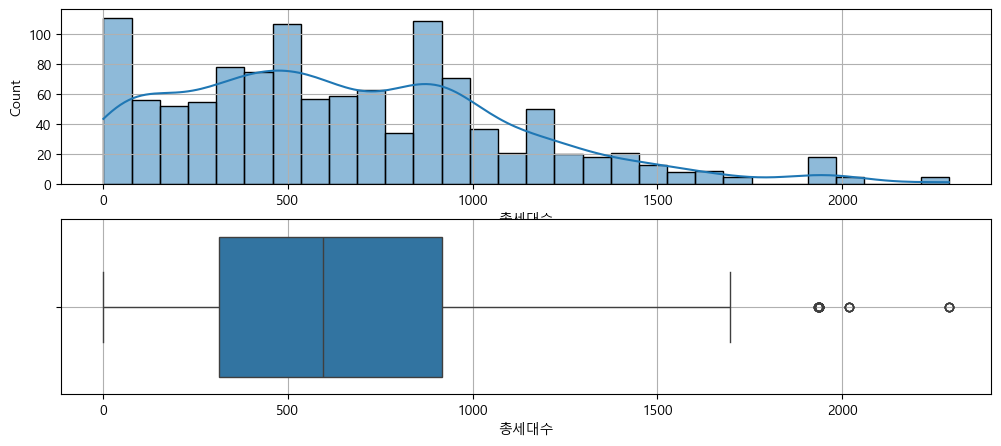

In [354]:
# 총세대수
eda_1_n(base_data,'총세대수')

 <<<  지역   >>


,Class,Count,Prop
0,경기,294,0.254105
1,대구경북,192,0.165946
2,광주전남,157,0.135696
3,서울,144,0.124460
4,부산울산,135,0.116681
5,대전충남,105,0.090752
6,경남,49,0.042351
7,강원,28,0.024201
8,전북,17,0.014693
9,충북,15,0.012965


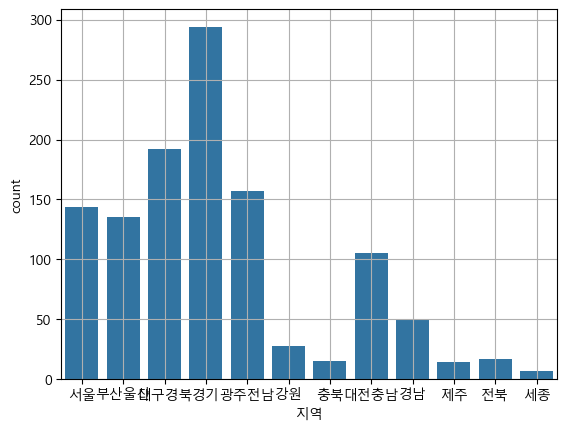

In [355]:
eda_1_c(base_data,'지역')

,count,mean,std,min,25%,50%,75%,max
준공년도,1157.0,2008.299914,6.982611,1970.0,2005.0,2009.0,2013.0,2022.0


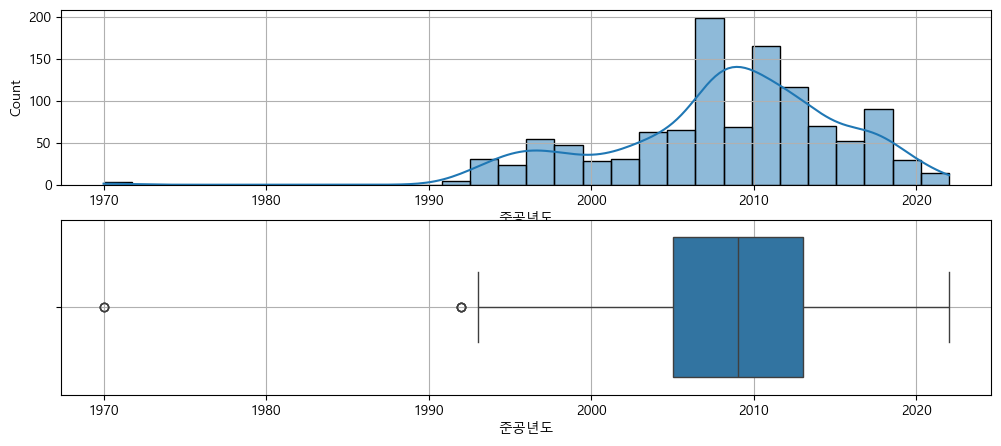

In [356]:
eda_1_n(base_data,'준공년도')

 <<<  건물형태   >>


,Class,Count,Prop
0,복도식,645,0.557476
1,계단식,321,0.277442
2,혼합식,191,0.165082


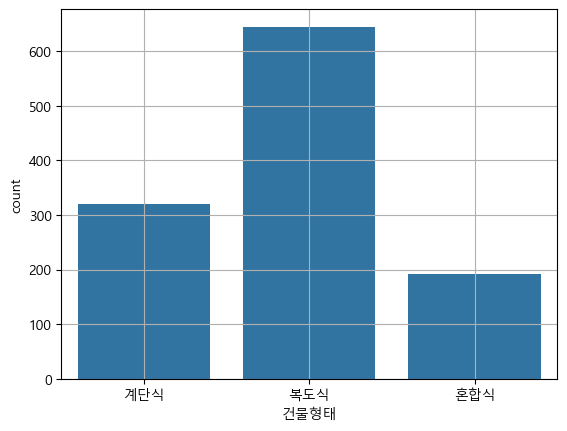

In [357]:
eda_1_c(base_data,'건물형태')

 <<<  난방방식   >>


,Class,Count,Prop
0,개별가스난방,643,0.555748
1,지역난방,333,0.287813
2,지역가스난방,120,0.103717
3,중앙가스난방,44,0.038029
4,중앙난방,11,0.009507
5,중앙유류난방,3,0.002593
6,지역유류난방,2,0.001729
7,개별유류난방,1,0.000864


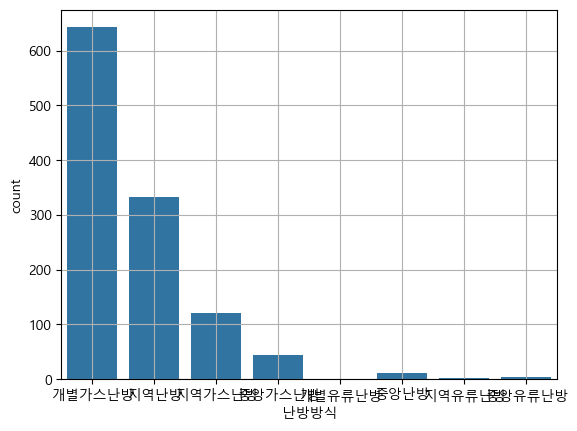

In [358]:
eda_1_c(base_data,'난방방식')

 <<<  승강기설치여부   >>


,Class,Count,Prop
0,전체동 설치,1128,0.974935
1,미설치,18,0.015557
2,일부동 설치,11,0.009507


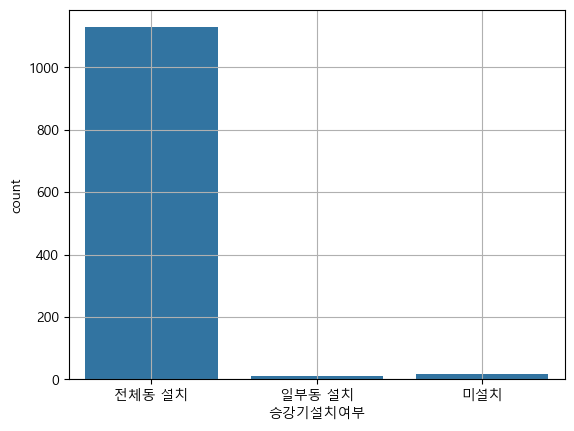

In [359]:
eda_1_c(base_data,'승강기설치여부')

,count,mean,std,min,25%,50%,75%,max
실차량수,1157.0,650.762316,390.573462,21.0,320.0,626.0,894.0,1657.0


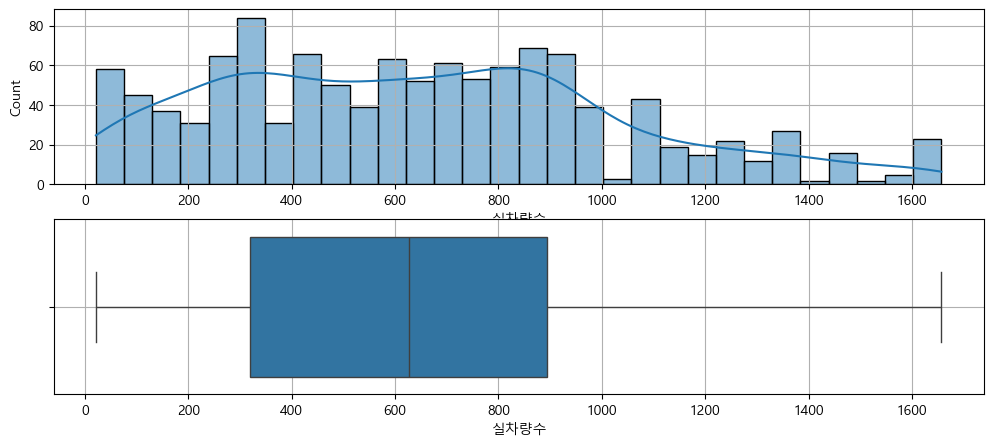

In [360]:
eda_1_n(base_data,'실차량수')

,count,mean,std,min,25%,50%,75%,max
전용면적별세대수,1157.0,163.691443,166.766358,1.0,44.0,112.0,229.0,1258.0


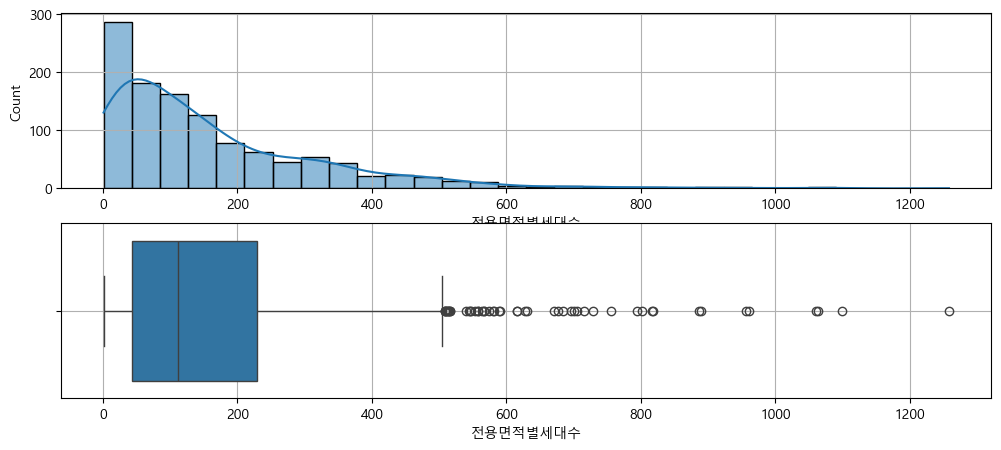

In [361]:
eda_1_n(base_data,'전용면적별세대수')

,count,mean,std,min,25%,50%,75%,max
전용면적,1157.0,51.565584,18.243315,17.59,39.48,46.9,59.81,139.35


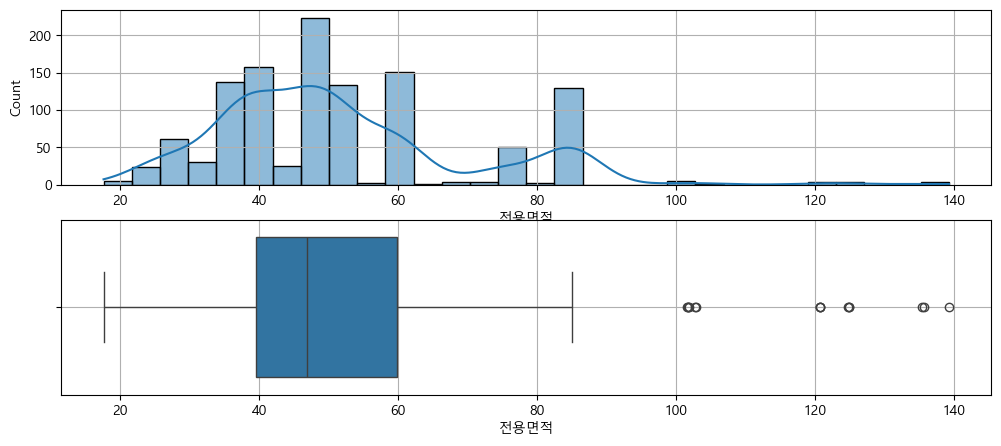

In [362]:
eda_1_n(base_data,'전용면적')

,count,mean,std,min,25%,50%,75%,max
공급면적(공용),1157.0,20.56236,5.164405,5.85,16.9974,20.3847,23.7225,42.76


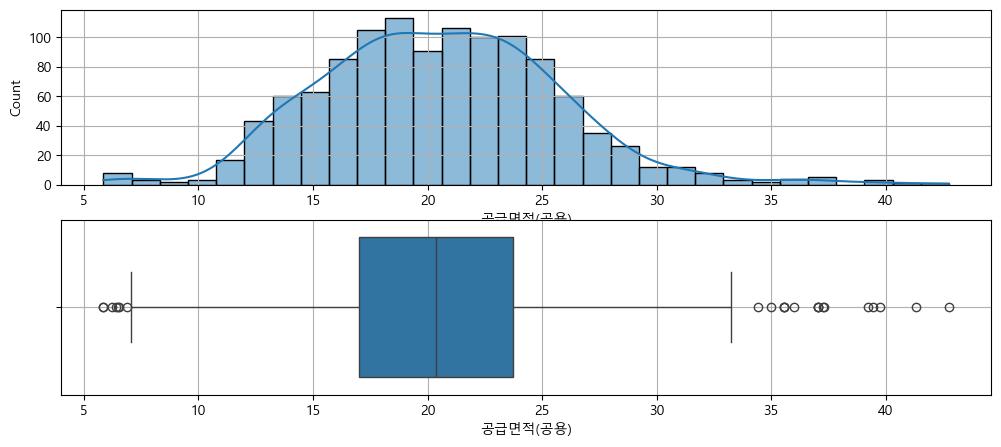

In [363]:
eda_1_n(base_data,'공급면적(공용)')

,count,mean,std,min,25%,50%,75%,max
임대보증금,1157.0,2.850789e+07,2.890687e+07,0.0,13797000.0,19973000.0,33753000.0,254922000.0


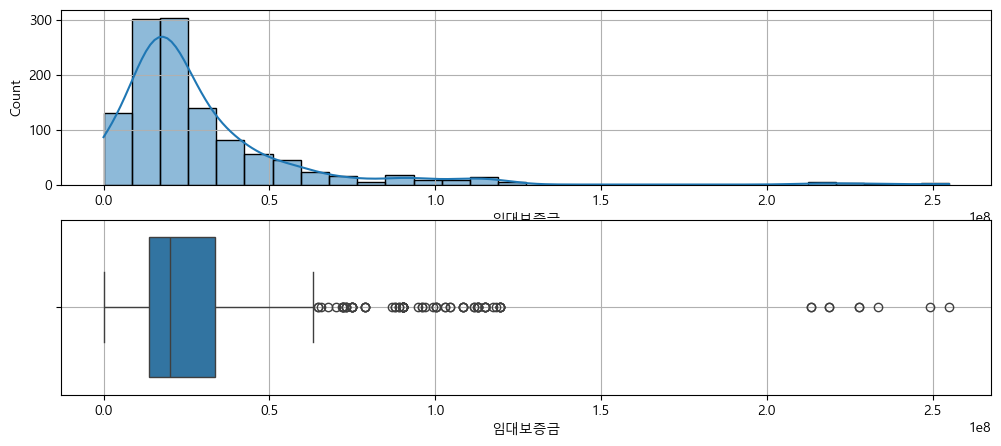

In [364]:
eda_1_n(base_data,'임대보증금')

,count,mean,std,min,25%,50%,75%,max
공급면적(공용),1157.0,20.56236,5.164405,5.85,16.9974,20.3847,23.7225,42.76


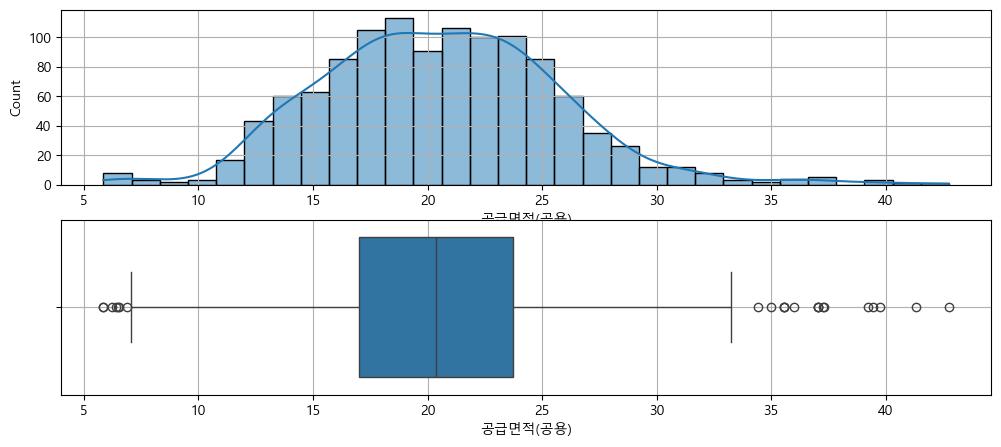

In [365]:
# 10  공급면적(공용)      1157 non-null   float64 
eda_1_n(base_data,'공급면적(공용)')

- 몇개의 이상치가 보이긴 하나 정규분포를 띄고 있다. 

,count,mean,std,min,25%,50%,75%,max
임대보증금,1157.0,2.850789e+07,2.890687e+07,0.0,13797000.0,19973000.0,33753000.0,254922000.0


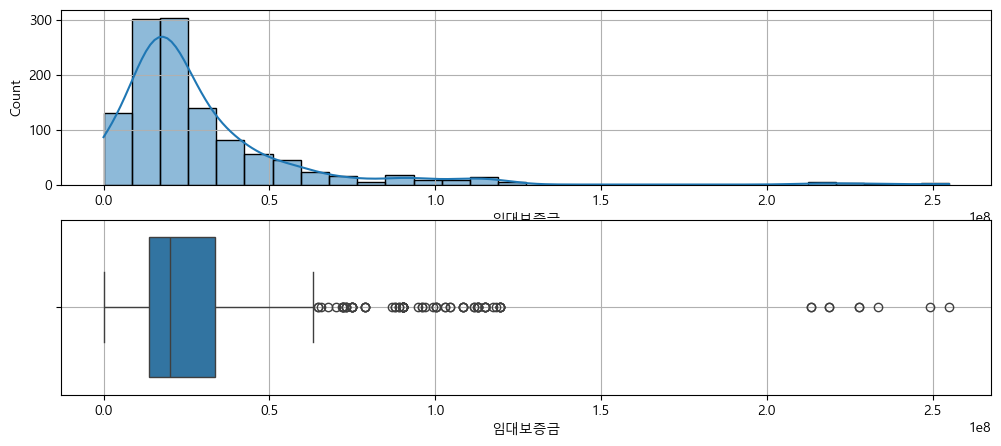

In [367]:
# 11  임대보증금         1157 non-null   int64   
eda_1_n(base_data,'임대보증금')

- 보증금은 원래 가격대가 좀 뭉치는 경향이 있어서..뭔가 세분화적으로 알아보고 싶다면 지역별 임대보증금 추이를 봐야될 듯

,count,mean,std,min,25%,50%,75%,max
임대료,1157.0,225940.88159,176810.241586,0.0,117740.0,184290.0,263440.0,1058030.0


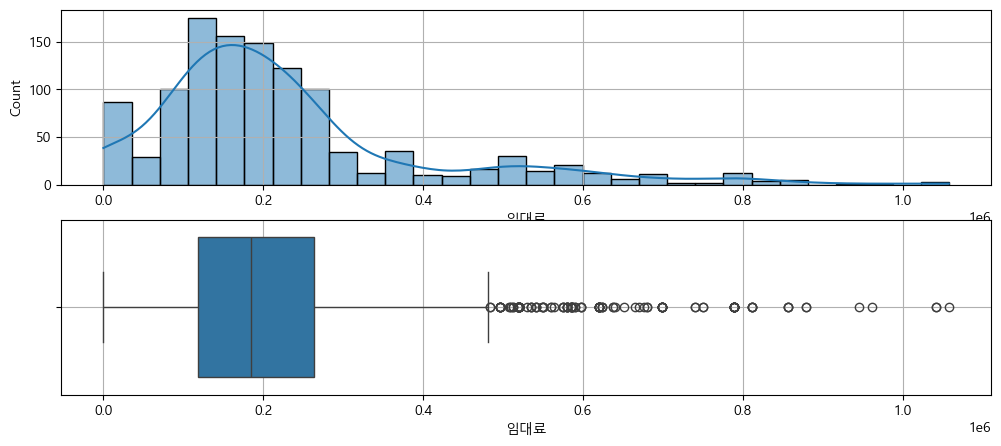

In [369]:
# 12  임대료           1157 non-null   int64   
eda_1_n(base_data,'임대료')

- 앞서 임대료와 임대보증금이 0인 행이 좀 많았음.
- 그리고 임대보증금이 0인 곳이 차량이 적은 곳도 아녔고, 최상위 쪽도 해당이란 말임..
- 자가이다? 정도밖에 . 입력이 안됐다거나

In [371]:
# 임대보증금이랑 임대료가 0인 경우를 확인
temp = base_data.loc[(base_data['임대료']==0 ) | (base_data['임대보증금'] == 0)][['지역','실차량수','단지별 면적별 구간','전용면적_구간','단지코드']]
temp


,지역,실차량수,단지별 면적별 구간,전용면적_구간,단지코드
23,부산울산,892,2구간,초소형 주택,C0008
24,부산울산,892,4구간(최상위),소형 아파트,C0008
25,부산울산,744,4구간(최상위),중형 아파트,C0009
26,부산울산,744,4구간(최상위),중형 아파트,C0009
27,부산울산,363,2구간,초소형 주택,C0010
...,...,...,...,...,...
275,제주,246,4구간(최상위),중형 아파트,C0088
276,제주,246,4구간(최상위),중형 아파트,C0088
277,제주,246,4구간(최상위),중형 아파트,C0088
333,경기,301,3구간,소형 아파트,C0109


 <<<  단지별 면적별 구간   >>


,Class,Count,Prop
0,1구간(최하위),291,0.251513
1,3구간,289,0.249784
2,4구간(최상위),289,0.249784
3,2구간,288,0.248920


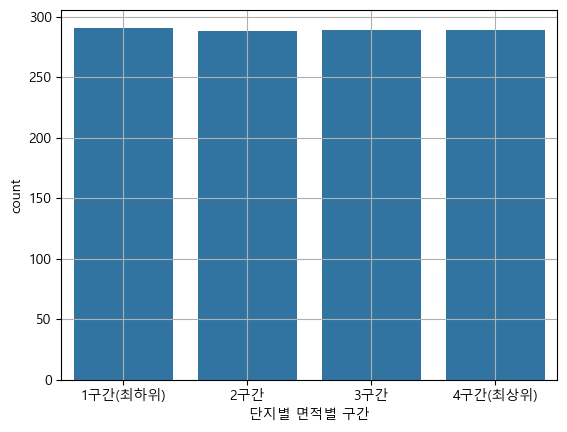

In [372]:
#14  단지별 면적별 구간    1157 non-null   category
eda_1_c(base_data, '단지별 면적별 구간')

 <<<  전용면적_구간   >>


,Class,Count,Prop
0,소형 아파트,542,0.468453
1,초소형 주택,410,0.354365
2,중형 아파트,190,0.164218
3,대형 아파트,12,0.010372
4,초대형 아파트,3,0.002593
5,중대형 아파트,0,0.000000


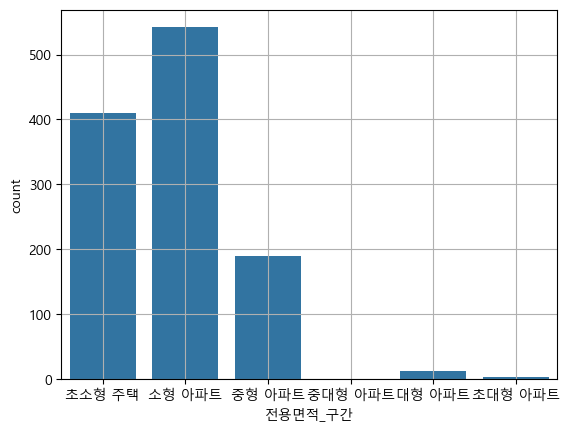

In [373]:
#14  전용면적_구간
eda_1_c(base_data, '전용면적_구간')


- 면적을 분기별로 나눠놔서 이런 결과나 나타남.

,count,mean,std,min,25%,50%,75%,max
공급별_총_면적,1157.0,11117.129153,11417.523803,30.1,3070.67,7734.66,15042.64,90472.67


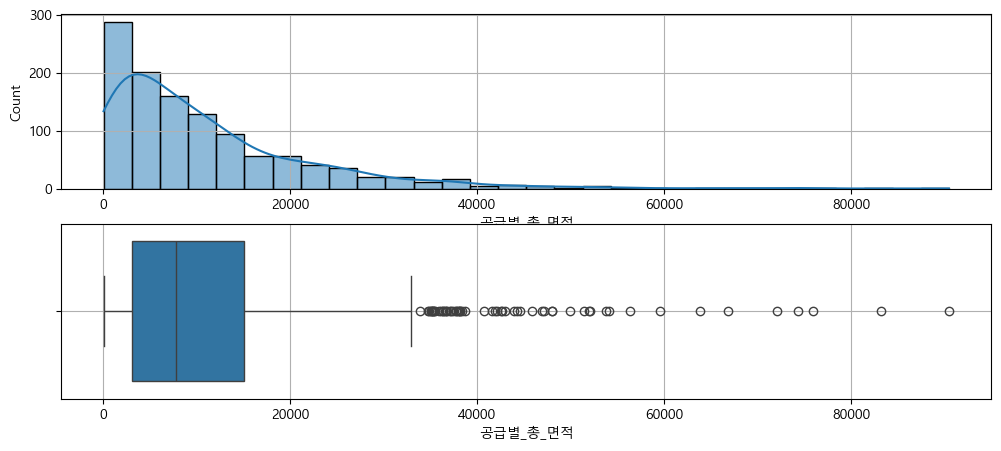

In [375]:
#15  공급별_총_면적      1157 non-null   float64 
eda_1_n(base_data,'공급별_총_면적')

- 아무래도 이건...공급되는 면적이 거기서 거기니

,count,mean,std,min,25%,50%,75%,max
단지별_임대보증금_평균,1157.0,2.850789e+07,2.701517e+07,0.0,14979500.0,21319142.9,32345666.7,189821857.1


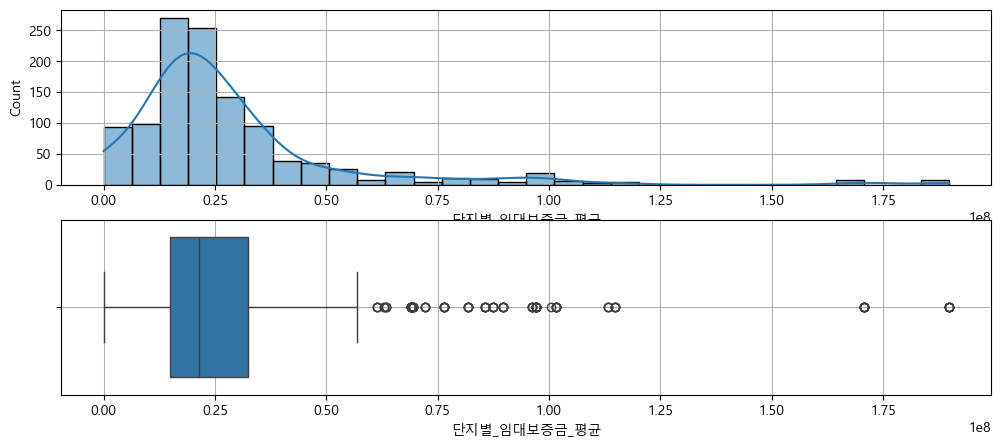

In [377]:
#16  단지별_임대보증금_평균  1157 non-null   float64 
eda_1_n(base_data,'단지별_임대보증금_평균')

,count,mean,std,min,25%,50%,75%,max
단지별_임대료_평균,1157.0,225940.8828,172534.344433,0.0,132910.0,185656.7,246652.5,950305.0


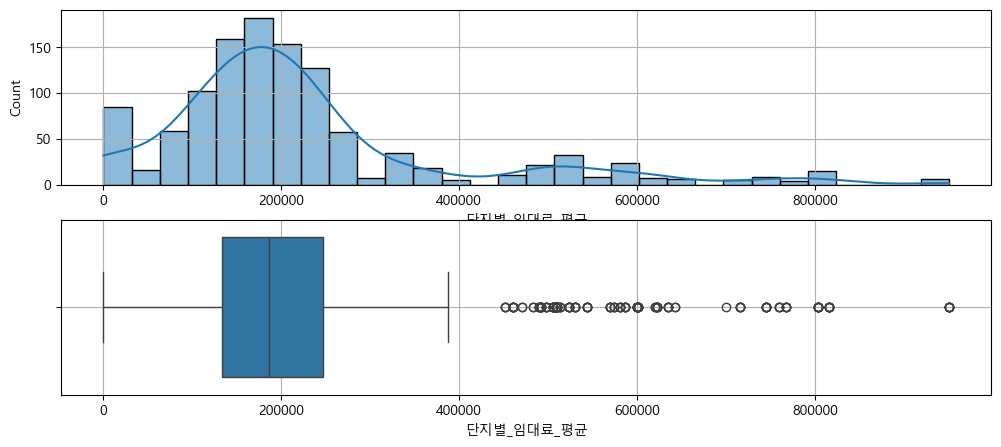

In [378]:
 #17  단지별_임대료_평균    1157 non-null   float64 
eda_1_n(base_data,'단지별_임대료_평균')

- 얼추 보증금 평균이랑 임대료랑 비슷하다

,count,mean,std,min,25%,50%,75%,max
단지별_임대료_평균,1157.0,225940.8828,172534.344433,0.0,132910.0,185656.7,246652.5,950305.0


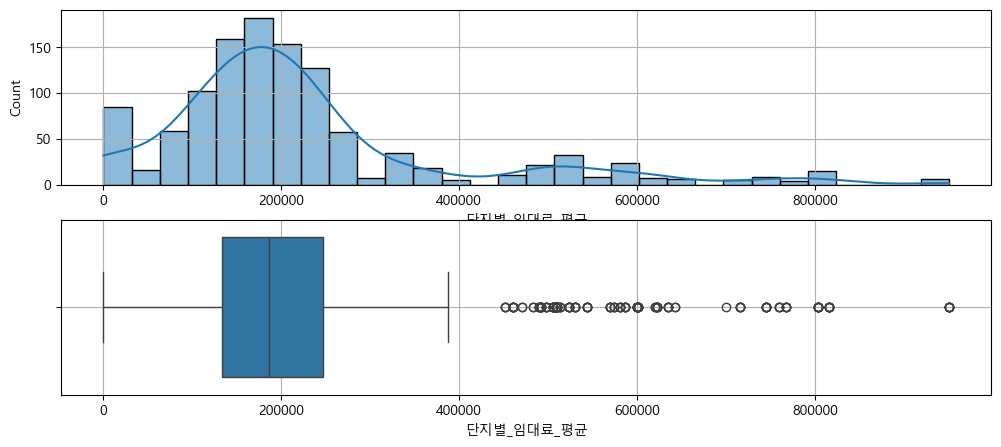

In [380]:
#18  지역_임대료_평균     1157 non-null   float64 
eda_1_n(base_data,'단지별_임대료_평균')

,count,mean,std,min,25%,50%,75%,max
지역_임대보증금_평균,1157.0,2.850789e+07,1.071471e+07,11014000.0,20215923.81,22233433.12,40444782.31,44909152.78


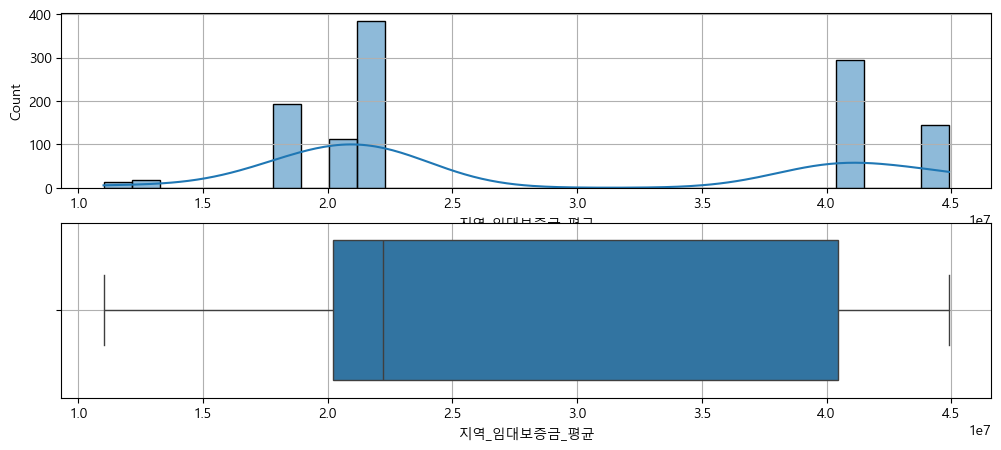

In [381]:
 #19  지역_임대보증금_평균   1157 non-null   float64 
eda_1_n(base_data,'지역_임대보증금_평균')

,count,mean,std,min,25%,50%,75%,max
단지별_차량비율,1157.0,1.161917,0.965909,0.001117,0.84897,1.0752,1.269461,8.632353


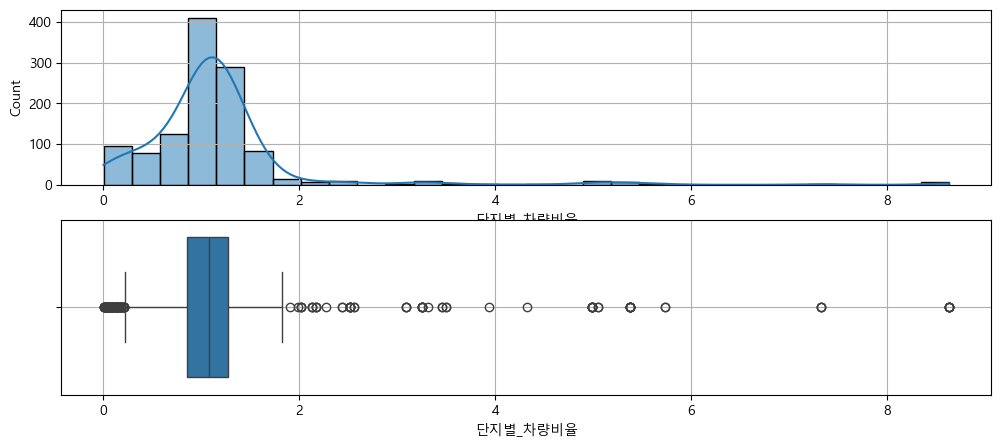

In [382]:
# 20  단지별_차량비율      1157 non-null   float64 
eda_1_n(base_data,'단지별_차량비율')

아예 안가지거나 1대를 가진 가구가 많다

### (3) 이변량 분석

* **세부 요구사항**
    - 숫자형 feature --> target
        - 전체 변수들 간의 상관관계 구하기
            * 범주형 변수를 제외한 데이터셋을 이용하여
            * df.corr() + sns.heatmap() 으로 전체 상관계수를 시각화 합니다.
        - 등록차량수와 상관계수가 높은 상위 3~5개에 대해서 산점도를 그려 봅시다.
    - 범주형 feature --> target
        * 지역 : sns.barplot()으로 시각화 해 봅시다.

#### 1) 전체 숫자형 변수들 간의 상관관계

In [387]:
# 상호 상관계수 구하고 시각화 하기
def eda_2_corr(data, drop_vars, viz = 0):
    # 입력
    #     * 데이터프레임(data)
    #     * 불필요한 변수(drop_vars) : 리스트
    # 출력 :
    #     * viz = 0 : 히트맵만 출력
    #     * viz = 1 : 상관계수만 출력
    #     * 그외 : 상관계수 + 히트맵

    temp = data.drop(drop_vars,axis = 1).corr()
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    mask = np.where(mask == 1, 0, 1)
    result = mask * temp
    result = result[result != 0]

    if viz == 0 :
        plt.figure(figsize = (15,12))
        sns.heatmap(result, annot = True)
        plt.show()
    elif viz == 1 :
        display(result)
    else :
        display(result)
        plt.figure(figsize = (8,8))
        sns.heatmap(result, annot = True)
        plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


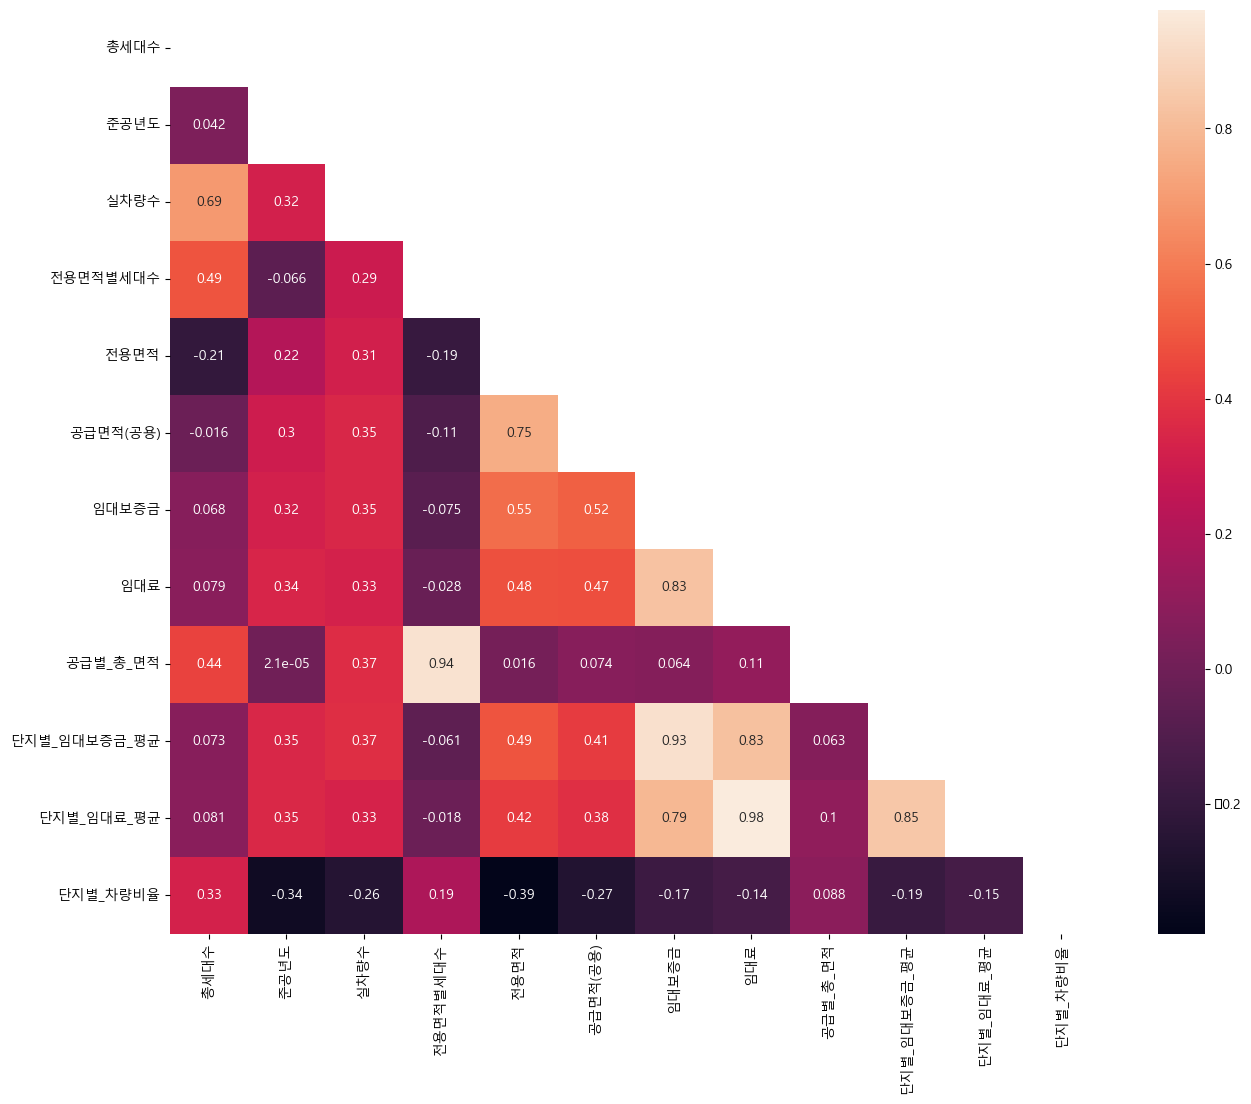

In [388]:
eda_2_corr(base_data, ['단지코드' , '지역', '건물형태','난방방식','승강기설치여부','단지별 면적별 구간','지역_임대료_평균','지역_임대보증금_평균','전용면적_구간'])

그리 관련있는게 안보이는데? 다 비슷한 영향을 준다  --> 종합적으로 판단하라

In [390]:
import scipy.stats as spst

#### 2) 숫자형 feature --> 실차량수

In [392]:
def eda_2_nn(data, feature, target) :
    # 상관분석
    result = spst.pearsonr(data[feature], data[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')

    # 산점도
    temp = data.loc[data[feature].notnull()]
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()
    plt.show()


#### 준공년도

상관계수 : 0.32015424169056733, P-value : 5.491873294511883e-29


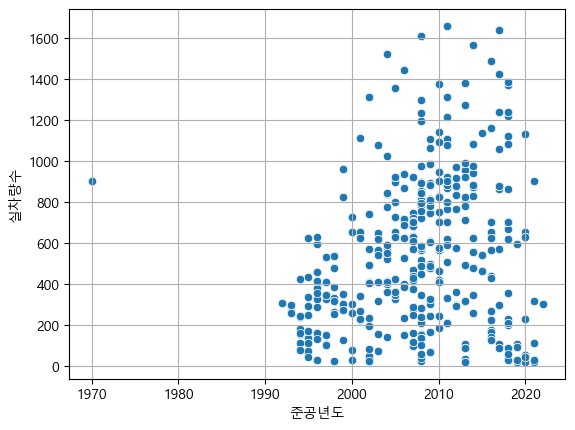

In [394]:
# 준공년도가 실차량수와 관련이 있다.
eda_2_nn(base_data, '준공년도', '실차량수')

- nan값에 대해 최소값으로 전처리 했고, 그 후 1111,1900에 대해서 평균값으로 넣었으니 동 떨어진 1970 제외 나머지 부분에서 그나마 관계성을 보임
- 시기가 2000년대부터 단지별 차량소유가 1000대 넘었음.  이 점을 보아선 빠른 시일 내로 어떤 단지는 2000대가 넘을 것으로 보임.
- 그러나 표를 보면 1000대 이하 쪽으로 단지들이 몰려있는 것을 보아 앞으로 주차공간을 생각한다면 최소를 1000대로 잡고 짓는 것이 좋을 것으로 봄

In [396]:
temp = base_data[base_data['준공년도'] > 1990]

상관계수 : 0.34321920104489223, P-value : 3.0169012284509795e-33


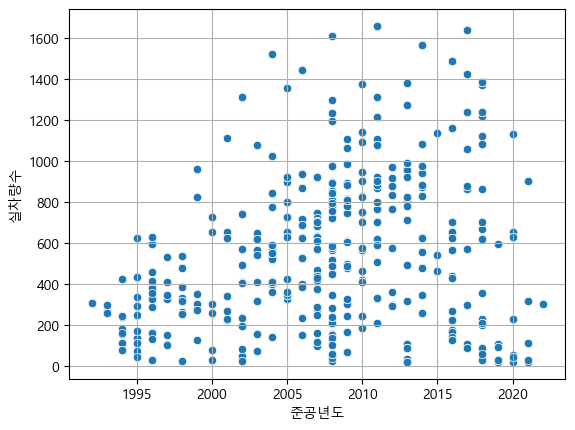

In [397]:
# 준공년도가 실차량수와 관련이 있다.
eda_2_nn(temp, '준공년도', '실차량수')

#### 전용면적별세대수

상관계수 : 0.2940534266634552, P-value : 1.6458250287693726e-24


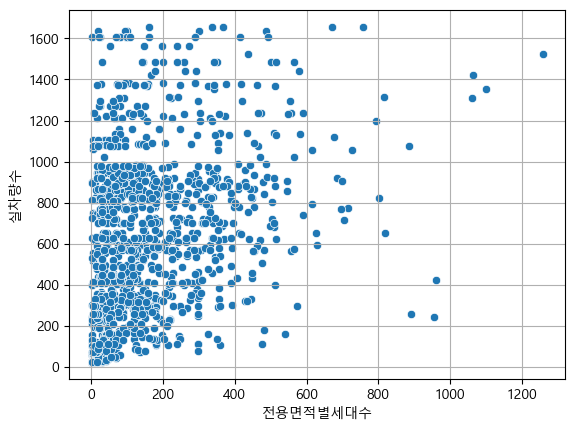

In [399]:
# 전용면적별세대수ㅁ
eda_2_nn(base_data, '전용면적별세대수', '실차량수')

- 400세대까지 분포가 밀집

#### 전용면적

상관계수 : 0.31433590163090064, P-value : 5.985094586248164e-28


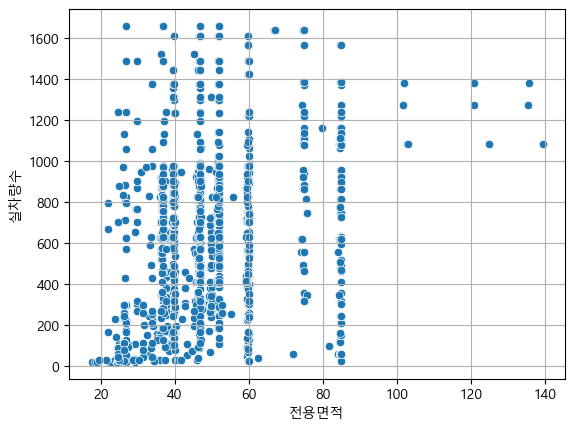

In [402]:
#전용면적
eda_2_nn(base_data, '전용면적', '실차량수')

- 전용면적이 60세대 미만이라면 1500대 정도의 주차공간을 확보하면 좋을 듯 하다.
- 80세대가 넘어간다면 1400대 정도로 생각하고 확보하면 주차문제는 많이 줄 것으로 보임

#### 공급면적(공용)

상관계수 : 0.34978206077115354, P-value : 1.2385295088430053e-34


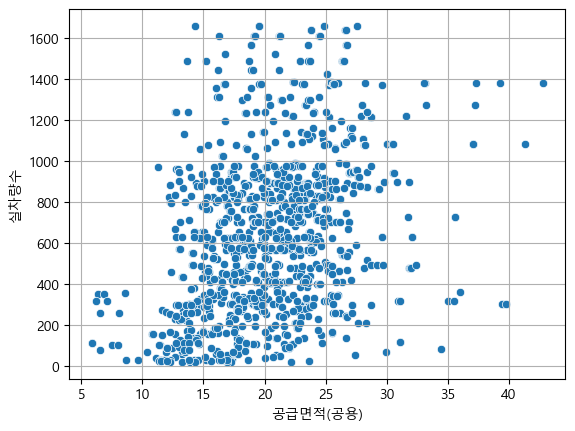

In [405]:
# 공급면적(공용)
eda_2_nn(base_data, '공급면적(공용)', '실차량수')

- 같이 쓰는 공공시설 면적에 따른 차량수..
- 건물을 지을 때 25 정도만 계산하고 건설해도 괜찮단 걸 알 수 있고, 최소 1000대를 주차공간 확보해야 한다

#### 임대보증금

상관계수 : 0.3500132776187683, P-value : 1.1127061511566005e-34


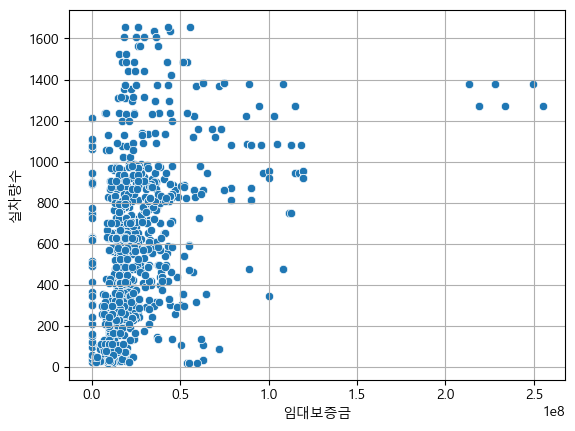

In [408]:
# 임대보증금
eda_2_nn(base_data, '임대보증금', '실차량수')

- 이것도 다른 그래프들 결과와 같이 앞부분에 몰려있는데, .. 좀 더 정확히 따질려면 면젹과 연결지어서 가격대와 실차량을 비교하는게 좋을 거 같다

#### 임대료

상관계수 : 0.32539339925507105, P-value : 6.1075891946114165e-30


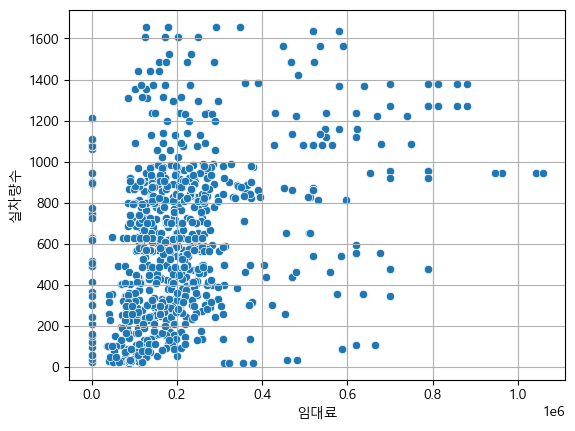

In [411]:
# 임대료
eda_2_nn(base_data, '임대료', '실차량수')

임대보증금 그래프와 비슷한 흐름을 보이는 것을 알 수 있다. 보증금쪽 생각과 동일

#### 공급별_총_면적

상관계수 : 0.3703113824498046, P-value : 6.426244809580618e-39


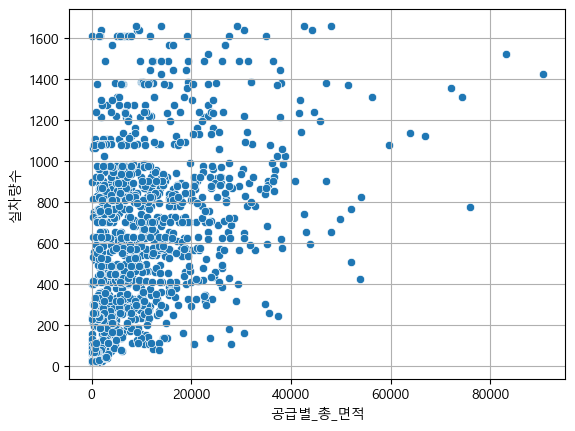

In [414]:
# 공급별_총_면적
eda_2_nn(base_data, '공급별_총_면적', '실차량수')

전용면적별세대수와 흐름이 같음. 

#### 단지별_임대보증금_평균

상관계수 : 0.3745225156195316, P-value : 7.758002282306237e-40


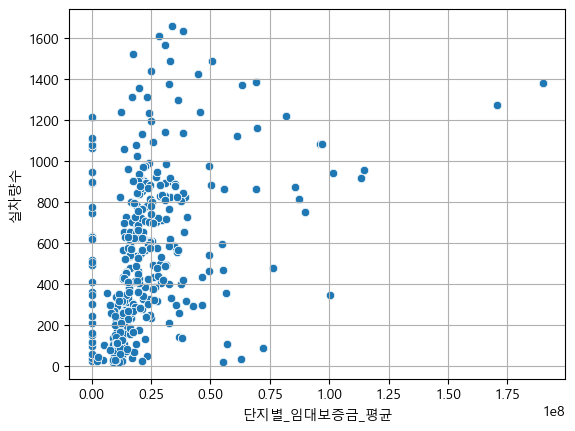

In [417]:
# 단지별_임대보증금_평균
eda_2_nn(base_data, '단지별_임대보증금_평균', '실차량수')

몇몇 세대를 제외하고, 주차공간을 최소 1000으로 잡고 가면 왠만한 단지 주차문제 해소 될 듯 싶다.

#### 단지별_임대료_평균

상관계수 : 0.33345757628730577, P-value : 1.9081231623975649e-31


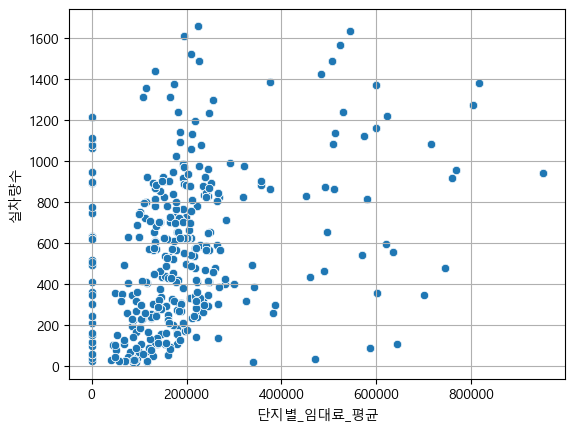

In [420]:
# 단지별_임대료_평균
eda_2_nn(base_data, '단지별_임대료_평균', '실차량수')

#### 단지별_차량비율

상관계수 : -0.25749013530941134, P-value : 5.611713808207279e-19


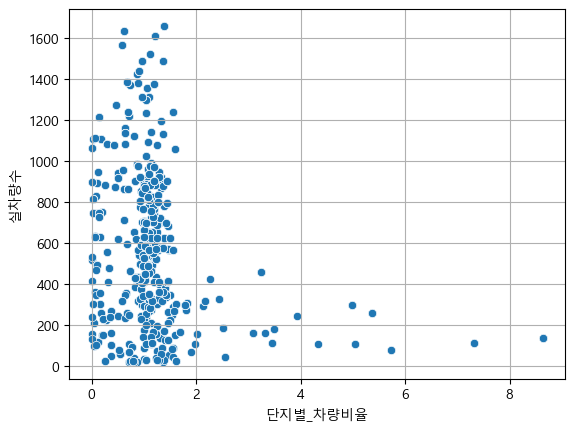

In [422]:
# 단지별_차량비율
eda_2_nn(base_data, '단지별_차량비율', '실차량수')

보면 그리 막 분포가 엄청 다르진 않음.
거기서 거기인 것을 볼 수 있는데, 

1. 지금(2024)를 기준으로 실차량수가 계속 늘어나고 있음. 다른 부분(나라 경쟁성장, 개인의 임금)을 고려해야 하긴 하나 일단 저 흐름대로 본다면 근 시일내로 2000대를 소유한 단지도 나타날 것임
2. 또 단지별_차량비율(이름이 이러긴 하나 단지별, 한 가구당 차량 소유 비율임) 을 보면 1대 이상을 보유한 가구가 기본이라 보고 집을 지으면 될 듯 하다.
3. 전용면적이 60세대 미만이라면 1500대 정도의 주차공간을 확보, 80세대가 넘어간다면 1400대 정도로 생각하고 확보하면 주차문제는 많이 줄 것으로 보임
4.  공급별 총 면적에 관련있는 변수는 전용면적,공급면적(공용), 전용 면적별 세대수 인데 보면 모양은 공급면적이랑 비슷한데 전용면적별 세대수의 분포처럼 y축에 가까이 있는 걸 알 수있다.  
    (추가로 분석이 필요하겠지만 일단 공급면적이 클 수록 그 단지가 속해있는 규모가 클 것이라 생각함.)
5. 임대료,임대보증금, 단지별 금액 평균은 추이가 비슷했다.  

#### 3) 범주형 feature --> 실차량수

In [425]:
base_data['준공년도'].value_counts()

준공년도
2008    133
2011     91
2010     75
2013     73
2009     69
2007     66
2014     59
2018     57
2016     52
2012     44
2004     42
2005     37
1996     34
2017     33
2002     31
2006     28
1999     26
1995     24
1998     22
2003     21
1997     20
2020     19
1993     18
2001     17
1994     13
2015     11
2000     11
2021     11
2019     10
1992      4
1970      3
2022      3
Name: count, dtype: int64

In [426]:
def eda_2_cn(data, feature, target) :

    # 가설검정
    # 범주의 수 확인
    cat = data[feature].unique()
    n = len(cat)

    # 범주가 2개
    if n == 2 :
        g0 = data.loc[data[feature] == cat[0], target]
        g1 = data.loc[data[feature] == cat[1], target]
        result = spst.ttest_ind(g0, g1)
    else :
        result = spst.f_oneway(*[data.loc[data[feature] == c, target] for c in cat])

    print(result)

    # 시각화 : 평균비교 막대그래프
    sns.barplot(x = feature, y = target, data = data)
    plt.grid()
    plt.show()

F_onewayResult(statistic=12.415301226338405, pvalue=2.176712458653898e-22)


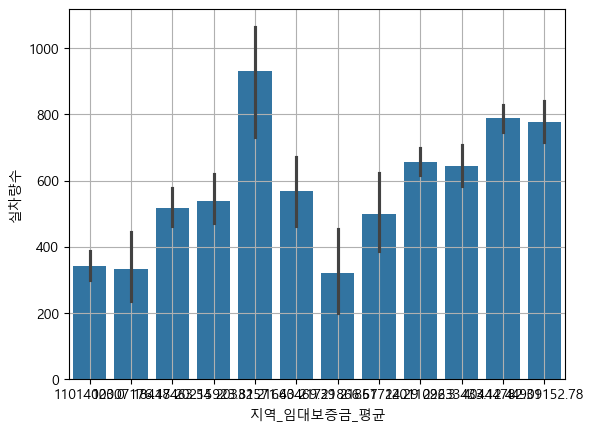

In [427]:
eda_2_cn(base_data, '지역_임대보증금_평균', '실차량수')

F_onewayResult(statistic=12.415301226338405, pvalue=2.176712458653898e-22)


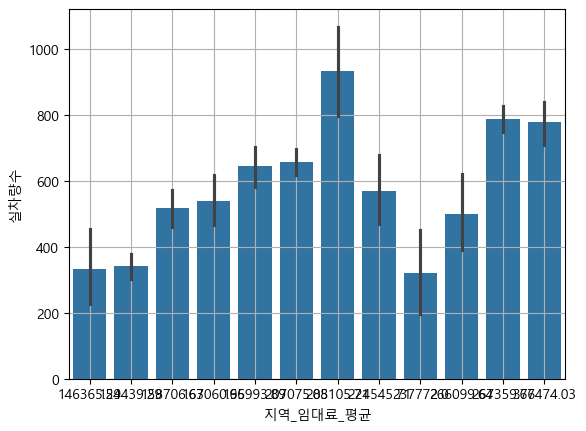

In [428]:
eda_2_cn(base_data, '지역_임대료_평균', '실차량수')

F_onewayResult(statistic=12.415301226338405, pvalue=2.176712458653898e-22)


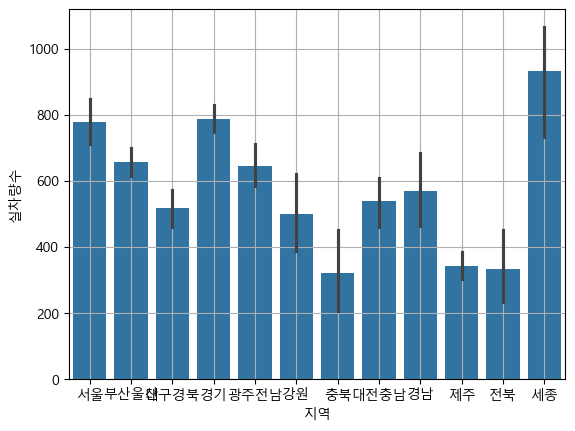

In [429]:
eda_2_cn(base_data,'지역','실차량수')

F_onewayResult(statistic=17.558623007577477, pvalue=3.0768943655152755e-08)


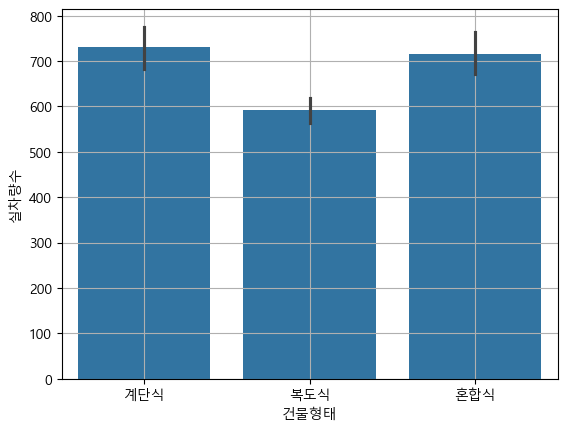

In [430]:
eda_2_cn(base_data,'건물형태','실차량수')

F_onewayResult(statistic=35.244151414075276, pvalue=9.471466972243307e-45)


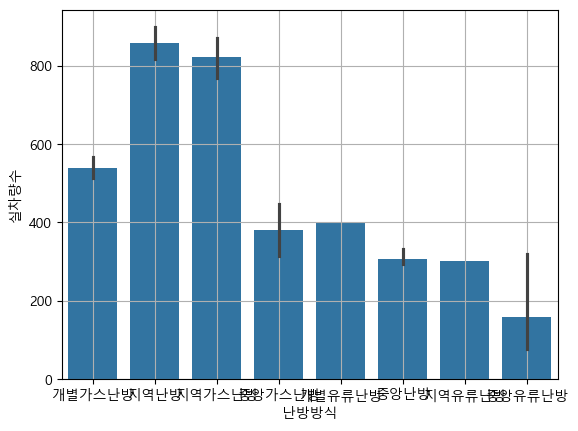

In [431]:
eda_2_cn(base_data,'난방방식','실차량수')

F_onewayResult(statistic=19.45361122785338, pvalue=4.905736725085538e-09)


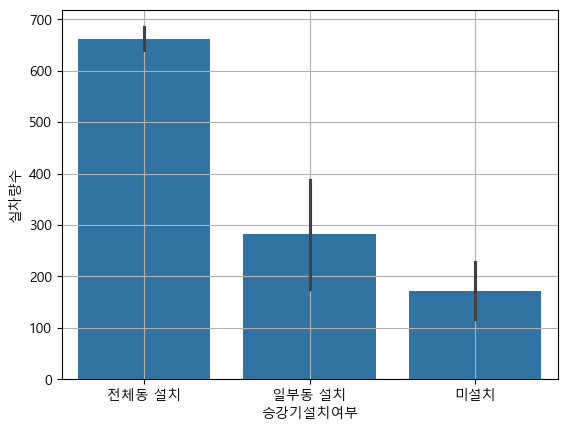

In [432]:
eda_2_cn(base_data,'승강기설치여부','실차량수')

- 전체동에 설치됐다는 뜻은 비교적 최근에 지어졌단 뜻이고 즉 승강기가 지하주차장과 연결되어 있는 경우가 많다는 말인데 그렇데 되면 실차량수가 더 많을 것으로 예상됨.

## 3.전처리_추가

* **세부요구사항**
    * 다음 사항은 선택 사항입니다.
        * 난방방식, 승강기설치여부 두 변수에 대해서 적은 수의 범주를 묶는 작업을 시도하시오.
        * 지역 : 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 삭제 합니다.

* 지역별 임대료 평균, 임대보증금 평균도 전처리 (지역)과 동일한 이유를 근거로 지우는게 좋을 거 같아요.

In [436]:
base_data['난방방식'].value_counts() , base_data['승강기설치여부'].value_counts()

(난방방식
 개별가스난방    643
 지역난방      333
 지역가스난방    120
 중앙가스난방     44
 중앙난방       11
 중앙유류난방      3
 지역유류난방      2
 개별유류난방      1
 Name: count, dtype: int64,
 승강기설치여부
 전체동 설치    1128
 미설치         18
 일부동 설치      11
 Name: count, dtype: int64)

In [437]:
base_data['난방방식'] = base_data['난방방식'].apply(
    lambda x: '개별난방' if '개별' in x 
              else '지역난방' if '지역' in x 
              else '중앙난방' if '중앙' in x 
              else '기타'
)

In [438]:
# 승강기 설치 여부를 '설치'와 '미설치'로 분류
base_data['승강기설치여부'] = base_data['승강기설치여부'].apply(
    lambda x: '설치' if '전체동 설치' in x else '미설치'
)


In [439]:
base_data.drop(columns=['지역','지역_임대료_평균','지역_임대보증금_평균'],inplace = True)

## 4.요인 정리
* 실차량수(Target)에 영향을 미치는 요인에 대해서, 다음의 3 그룹으로 정리합시다.
    * 강한 관계
    * 약한 관계
    * 관계 없음

In [441]:
# 싱관분석들 간의 관계가 그리 크게 영향이 적으나 p값의 귀무가설 지지하는 정도가 적기에 다들 고만고만한 영향을 실차량수에 준다고 생각한다